In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import joblib as j
import pathlib as p


In [3]:
# Cargar datos
data_path = '../data/processed/data_set.csv'
df = pd.read_csv(data_path)

# Separar variables independientes y dependiente
X = df.drop('desertor', axis=1)  # Cambia 'target' por el nombre real de la columna objetivo
y = df['desertor']

# Balanceo de clases
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Separar en train y test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar modelo SVM
model = SVC(kernel='rbf', random_state=42)
model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [4]:
# Predicciones y evaluación
y_pred = model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[59  0]
 [ 6 47]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        59
           1       1.00      0.89      0.94        53

    accuracy                           0.95       112
   macro avg       0.95      0.94      0.95       112
weighted avg       0.95      0.95      0.95       112



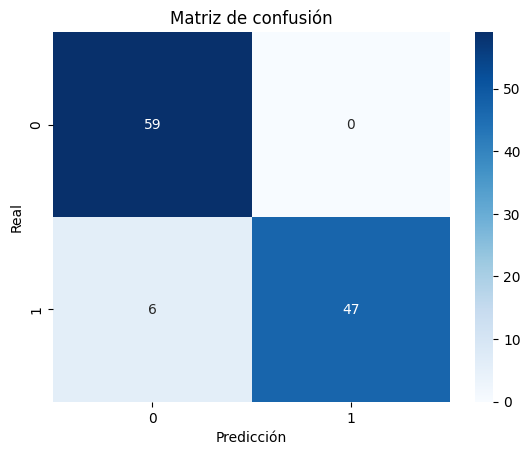

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

matriz_confusion = confusion_matrix(y_test,y_pred)

sns.heatmap(matriz_confusion,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión')
plt.show()

In [ ]:
path_save = p.Path('../models/modelo_svm.pkl')
j.dump(model,path_save)

['..\\models\\modelo_svm.pkl']